# 1. 卷积原理

① Conv1d代表一维卷积，Conv2d代表二维卷积，Conv3d代表三维卷积。

② kernel_size在训练过程中不断调整，定义为3就是3 * 3的卷积核，实际我们在训练神经网络过程中其实就是对kernel_size不断调整。

③ 可以根据输入的参数获得输出的情况，如下图所示。

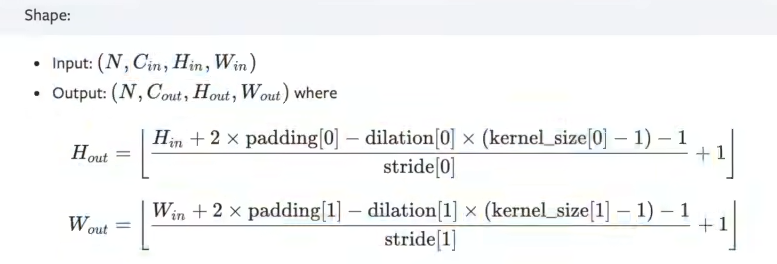

# 2. 搭建卷积层

In [1]:
import torch
from torch import nn
import torchvision
from torch.nn import Conv2d
from torch.utils.data import DataLoader

dataset = torchvision.datasets.CIFAR10("./dataset",train=False,transform=torchvision.transforms.ToTensor(),download=True)       
dataloader = DataLoader(dataset, batch_size=64)
class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()
        self.conv1 = Conv2d(in_channels=3,out_channels=6,kernel_size=3,stride=1,padding=0) # 彩色图像输入为3层，我们想让它的输出为6层，选3 * 3 的卷积                
    
    def forward(self,x):
        x = self.conv1(x)
        return x
    
tudui = Tudui()
print(tudui)

Files already downloaded and verified
Tudui(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
)


# 3. 卷积层处理图片

In [2]:
import torch
import torchvision
from torch import nn
from torch.nn import Conv2d
from torch.utils.data import DataLoader

dataset = torchvision.datasets.CIFAR10("./dataset",train=False,transform=torchvision.transforms.ToTensor(),download=True)       
dataloader = DataLoader(dataset, batch_size=64)
class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()
        self.conv1 = Conv2d(in_channels=3,out_channels=6,kernel_size=3,stride=1,padding=0) # 彩色图像输入为3层，我们想让它的输出为6层，选3 * 3 的卷积                
    
    def forward(self,x):
        x = self.conv1(x)
        return x
    
tudui = Tudui()
for data in dataloader:
    imgs, targets = data
    output = tudui(imgs)
    print(imgs.shape)   # 输入为3通道32×32的64张图片
    print(output.shape) # 输出为6通道30×30的64张图片

Files already downloaded and verified
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size

# 3. Tensorboard显示

In [3]:
import torch
import torchvision
from torch import nn
from torch.nn import Conv2d
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

dataset = torchvision.datasets.CIFAR10("./dataset",train=False,transform=torchvision.transforms.ToTensor(),download=True)       
dataloader = DataLoader(dataset, batch_size=64)
class Tudui(nn.Module):
    def __init__(self):
        super(Tudui, self).__init__()
        self.conv1 = Conv2d(in_channels=3,out_channels=6,kernel_size=3,stride=1,padding=0) # 彩色图像输入为3层，我们想让它的输出为6层，选3 * 3 的卷积                
    
    def forward(self,x):
        x = self.conv1(x)
        return x
    
tudui = Tudui()
writer = SummaryWriter("logs")
step = 0
for data in dataloader:
    imgs, targets = data
    output = tudui(imgs)
    print(imgs.shape)   
    print(output.shape)    
    writer.add_images("input", imgs, step)
    output = torch.reshape(output,(-1,3,30,30)) # 把原来6个通道拉为3个通道，为了保证所有维度总数不变，其余的分量分到第一个维度中
    writer.add_images("output", output, step)
    step = step + 1

Files already downloaded and verified
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size

torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([64, 3, 32, 32])
torch.Size([64, 6, 30, 30])
torch.Size([16, 3, 32, 32])
torch.Size([16, 6, 30, 30])


① 在 Anaconda 终端里面，激活py3.6.3环境，再输入 tensorboard --logdir=C:\Users\wangy\Desktop\03CV\logs 命令，将网址赋值浏览器的网址栏，回车，即可查看tensorboard显示日志情况。

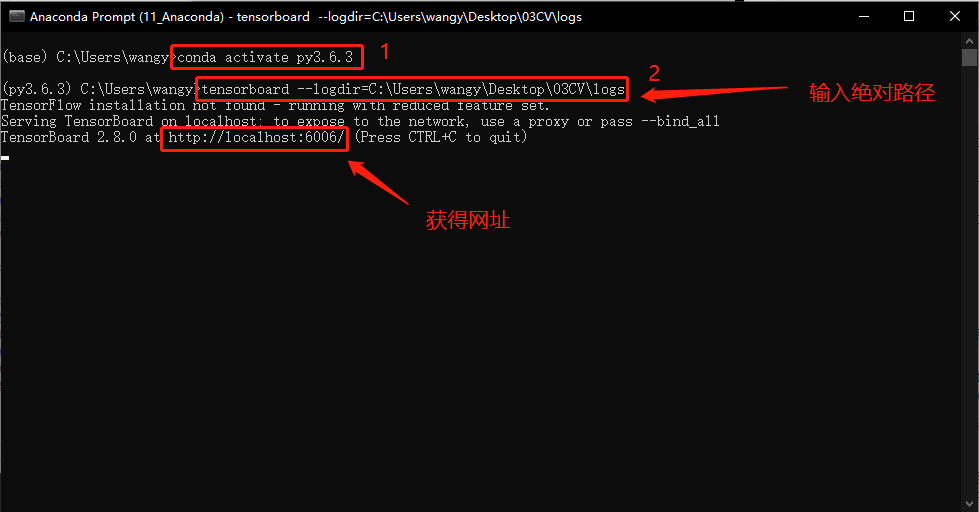

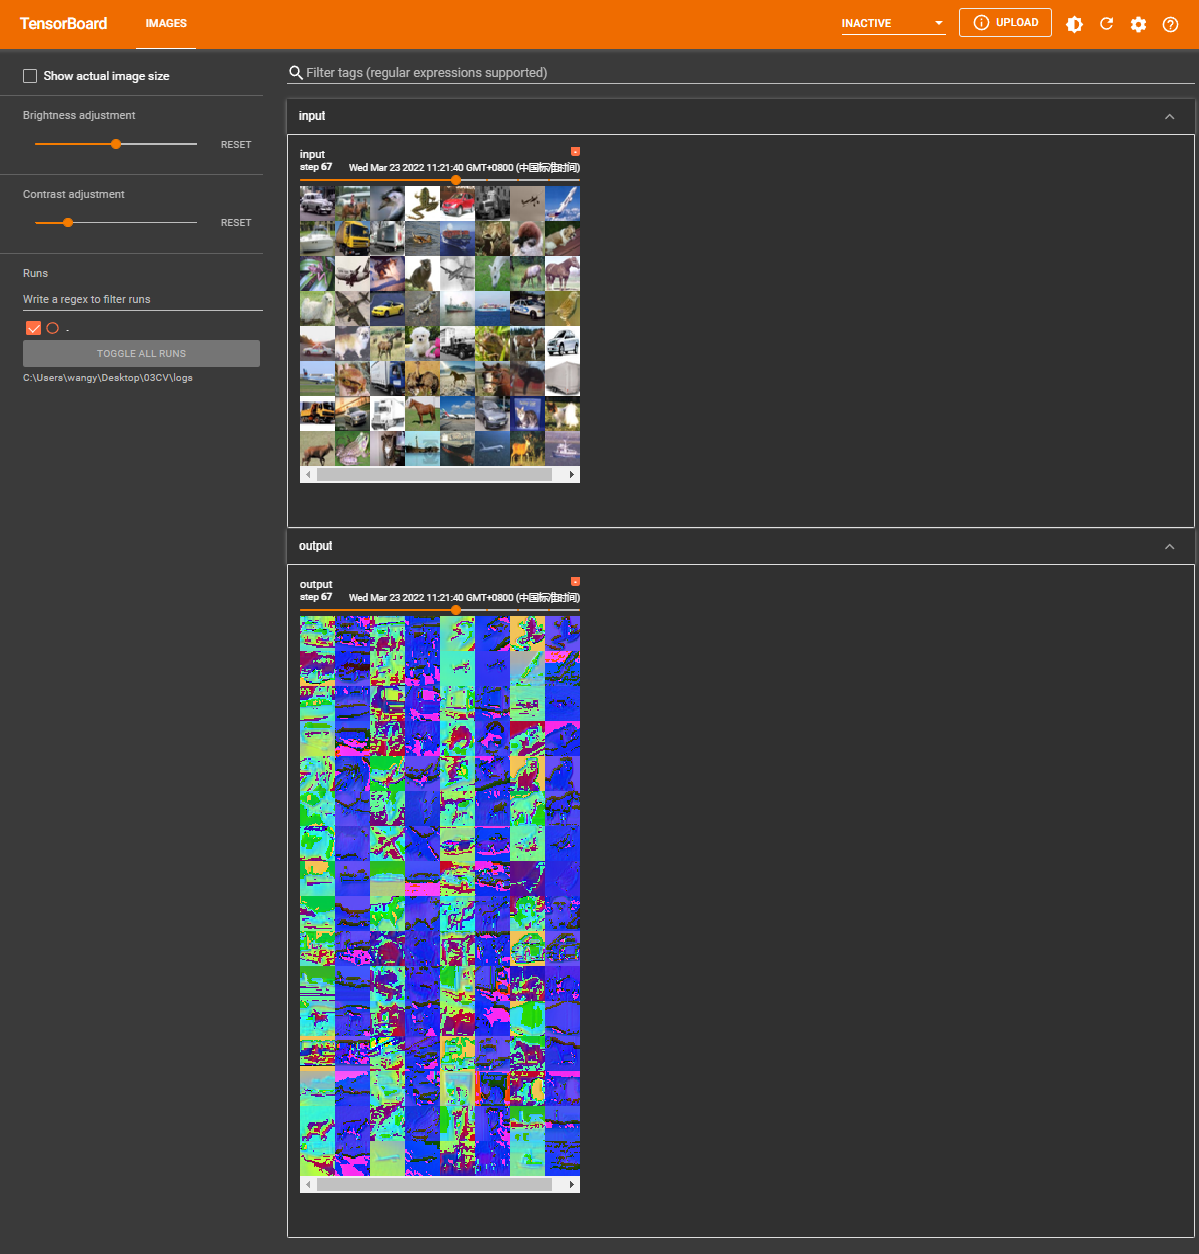